In [1]:
import quakepredict
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# read training data - very large!!! 629 million
tr_fname = '../test/data/train.csv'

rf_obj = quakepredict.RFQuake()
rf_obj.read_raw_data(tr_fname, False, 0, 50000000)

## Comments:
- inconsistent ttf change every 4096 samples
- sampling period is supposed to 4 MHz, but this is not reflected in the ttf values
- change in consecutive ttf values (not every 4096): ~1.1 ns
- change in ttf values (every 4096 samples): ~1 ms 
- also impossible to get distribution of ttf changes since 600 million is too large for numpy
- ignore inconsistencies in the ttf signal for now

In [3]:
rf_obj.compute_features()

elem per window:  7200000
elem per stride:  720000
[[12  6  8 ...  8  4  4]
 [ 2  6  8 ...  7  5  2]
 [ 9 11  6 ...  0  5  7]
 ...
 [-4  4 16 ... 13 12  3]
 [ 5  7  8 ...  5  9  6]
 [ 4  1  1 ...  7  5  5]]
[[ 1.46909998  1.46909998  1.46909998 ... 11.14069633 11.14069633
  11.14069633]
 [ 1.28289646  1.28289646  1.28289646 ... 10.95339731 10.95339731
  10.95339731]
 [ 1.09569745  1.09569745  1.09569745 ... 10.7661983  10.7661983
  10.7661983 ]
 ...
 [ 2.34999758  2.34999758  2.34999758 ...  0.47949843  0.47949843
   0.47949843]
 [ 2.16269857  2.16269857  2.16269857 ...  0.29219942  0.29219941
   0.29219941]
 [ 1.97549955  1.97549955  1.97549955 ...  0.1059959   0.10599589
   0.10599589]]
computing mean ...
computing standard deviation ...
computing variance ...
computing 1st moment ...
computing 2nd moment ...
computing 3rd moment ...
computing kurtosis ...
{'mean': array([4.50995653, 4.48480861, 4.45749361, 4.43909125, 4.43563708,
       4.45044083, 4.4509425 , 4.48604153, 4.51997153

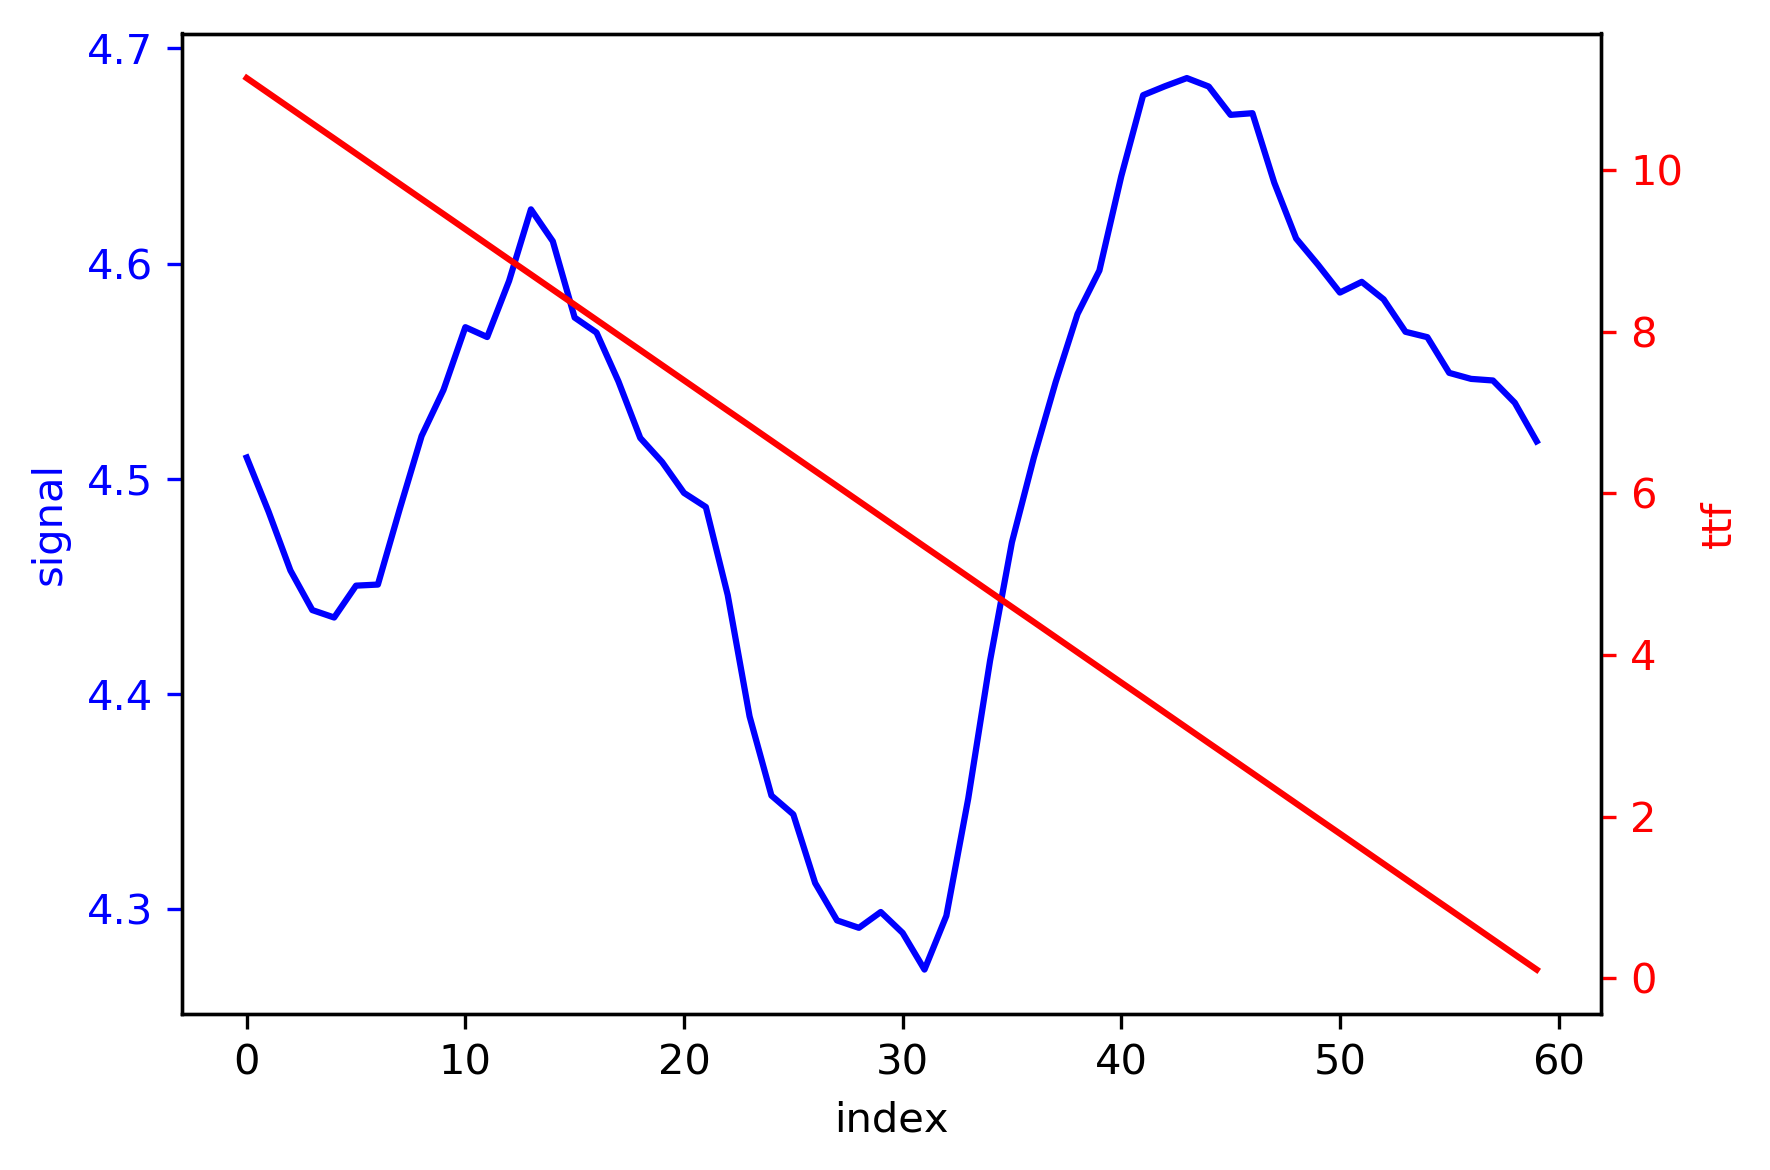

In [4]:
fig, ax1 = plt.subplots(dpi = 300)
samp_idx = np.arange(rf_obj.features.shape[0])
ax1.plot(samp_idx, rf_obj.features['mean'],'b')
ax1.set_xlabel('index')
ax1.set_ylabel('signal', color = 'b')
ax1.tick_params('y', colors = 'b')
#ax1.vlines(x = 4096, colors = 'g', ymin = sig.min(), ymax = sig.max())

ax2 = ax1.twinx()
ax2.plot(samp_idx, rf_obj.features['y'],'r')
ax2.set_ylabel('ttf', color = 'r')
ax2.tick_params('y', colors = 'r')

fig.tight_layout()


In [6]:
rf_obj.train_model()
rf_obj.regr.feature_importances_

Done training random regressor model...


AttributeError: 'RandomForestRegressor' object has no attribute 'features_importance_'

In [7]:
rf_obj.test_model()

Text(0, 0.5, 'Time to failure (random forest)')

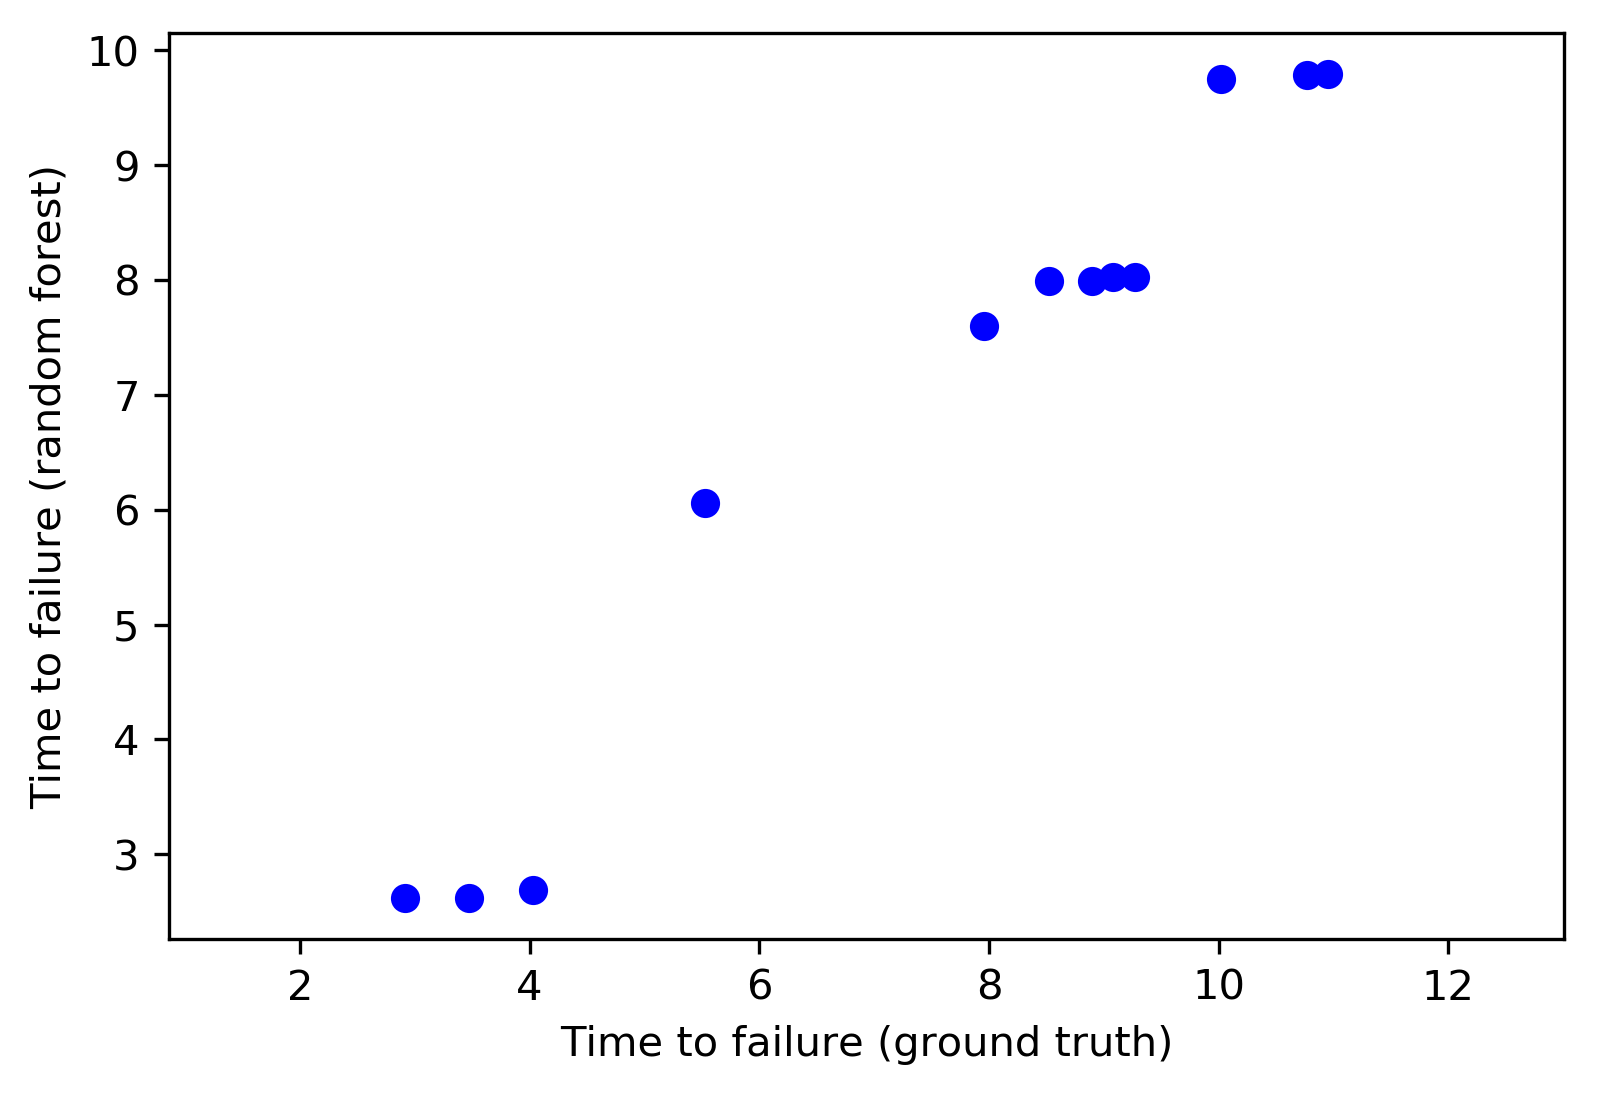

In [9]:
fig, ax1 = plt.subplots(dpi = 300)
ax1.plot(rf_obj.y_test, rf_obj.y_pred,'bo')
ax1.set_xlim([0, 14])
ax1.set_ylim([0, 14])
ax1.axis('equal')
ax1.set_xlabel('Time to failure (ground truth)')
ax1.set_ylabel('Time to failure (random forest)')